### ライブラリのインポート
optimizer_moduleは内部でtalib, matplotlib, pandasを使用している。

talibはpip installではそのままインストールできないので注意

In [1]:
import importlib

import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader

from optimizer_module import optimizer_rsi
from optimizer_module import optimizer_slow_stoch
from optimizer_module import optimizer_fast_stoch
from optimizer_module import optimizer_william

# importlib.reload(optimizer_rsi)
# importlib.reload(optimizer_slow_stoch)
# importlib.reload(optimizer_fast_stoch)
# importlib.reload(optimizer_william)

### 株価データの取得
株価データをpandas_datareaderで取得し、dfとする

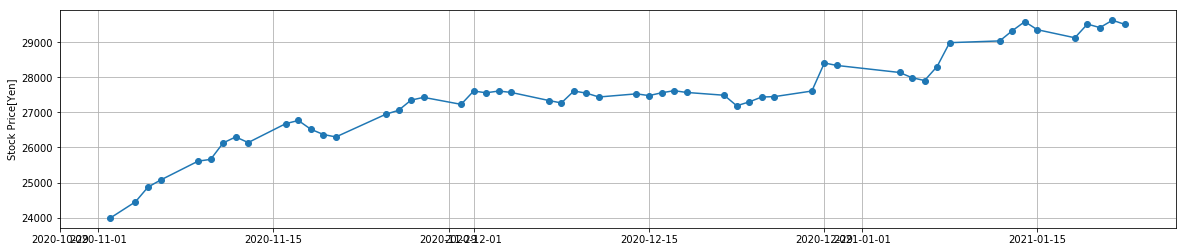

In [2]:
df = pandas_datareader.DataReader('1321.JP', 'stooq')
df = df.sort_index().tail(55)  # sorted by date

fig = plt.figure(figsize=(20, 4))
plt.plot(df["Close"], marker="o")
plt.ylabel("Stock Price[Yen]")
plt.grid()
fig.show()

### インスタンス化

In [3]:
optimizer_rsi = optimizer_rsi.RsiOptimizer()
optimizer_slow_stoch = optimizer_slow_stoch.SlowStochOptimizer()
optimizer_fast_stoch = optimizer_fast_stoch.FastStochOptimizer()
optimizer_william = optimizer_william.WilliamrOptimizer()

### パラメータ設定
set_params()関数で解析するパラメータを設定する。

help(rsi_optimizer.set_params())で設定の仕方を詳細確認できる

In [4]:
optimizer_rsi.set_params([3, 21], [25, 40], [65, 85])
optimizer_slow_stoch.set_params([3, 21], [2, 10], [2, 10])
optimizer_fast_stoch.set_params([3, 21], [2, 10])
optimizer_william.set_params([3, 25], [-90, -60], [-40, -5])

### 実行
runコマンドで実行する。その際dfを引数に設定する。
戻り値は解析結果を返すが、設定しなくても良い

In [5]:
result_rsi = optimizer_rsi.run(df)
result_slow_stoch = optimizer_slow_stoch.run(df)
result_fast_stoch = optimizer_fast_stoch.run(df)
result_william = optimizer_william.run(df)

RSI [17/17] 計算中...
計算終了
Slow Stoch [17/17] 計算中...
計算終了
Fast Stoch [17/17] 計算中...
計算終了
William %R [21/21] 計算中...
計算終了


### 解析結果の確認
計算後、result_params()関数で最適化したパラメータを確認できる(python dict型)

In [6]:
print(optimizer_rsi.result_params())
print(optimizer_slow_stoch.result_params())
print(optimizer_fast_stoch.result_params())
print(optimizer_william.result_params())

{'span': 7, 'buy_thres': 38, 'sell_thres': 83, 'profit': 107.55}
{'fastk': 4, 'slowk': 9, 'slowd': 5, 'profit': 112.01}
{'fastk': 3, 'fastd': 6, 'profit': 106.09}
{'span': 3, 'buy_thres': -78, 'sell_thres': -14, 'profit': 111.95}


### 全計算結果の表示
run()関数の返り値は、pandas.DataFrame型で返されるので必要に応じて確認できる。

In [7]:
result_rsi.head(3)

,span,buy,sell,profit
0,3,25,65,103.076923
1,3,25,66,103.076923
2,3,25,67,103.076923


In [8]:
result_slow_stoch.head(3)

,fastk,slowk,slowd,profit
0,3,2,2,103.375697
1,3,2,3,103.715561
2,3,2,4,109.147883


In [9]:
result_fast_stoch.head(3)

,fastk,fastd,profit
0,3,2,102.259711
1,3,3,103.836842
2,3,4,105.668005


In [10]:
result_william.head(3)

,span,buy,sell,profit
0,3,-90,-40,103.076923
1,3,-90,-39,103.076923
2,3,-90,-38,103.076923


### 解析結果のグラフ化
計算後、result_graph()関数でmatplotlibを用いてグラフ表示できる。

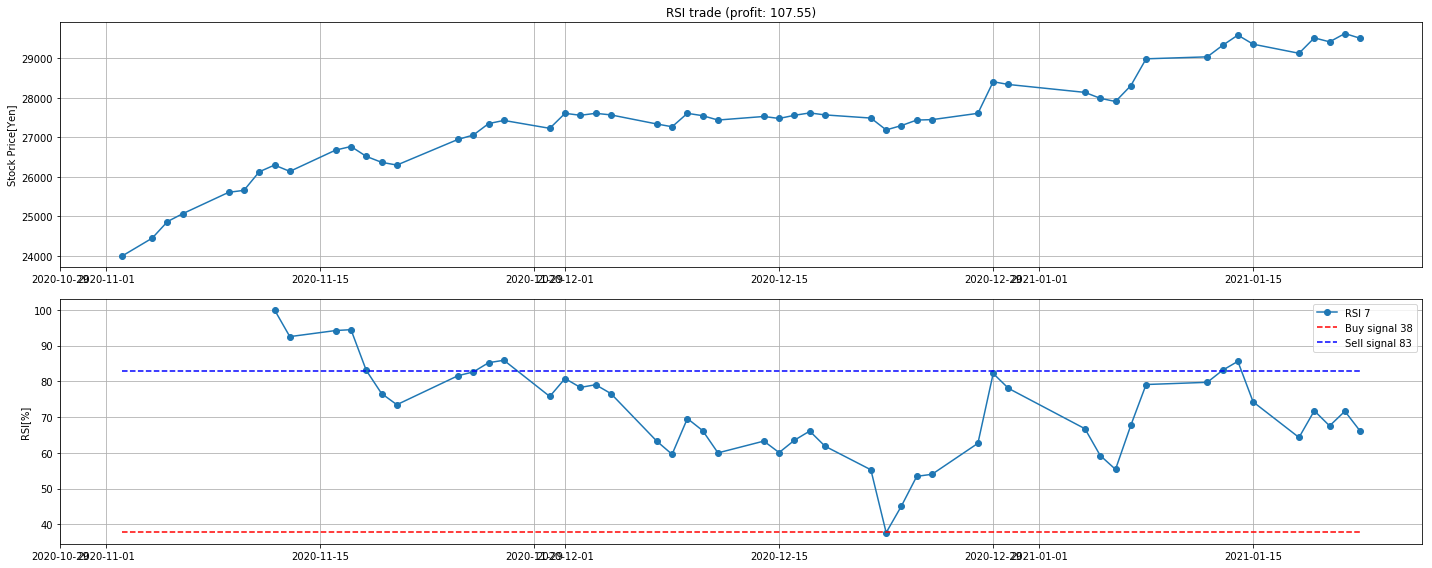

In [11]:
optimizer_rsi.result_graph()

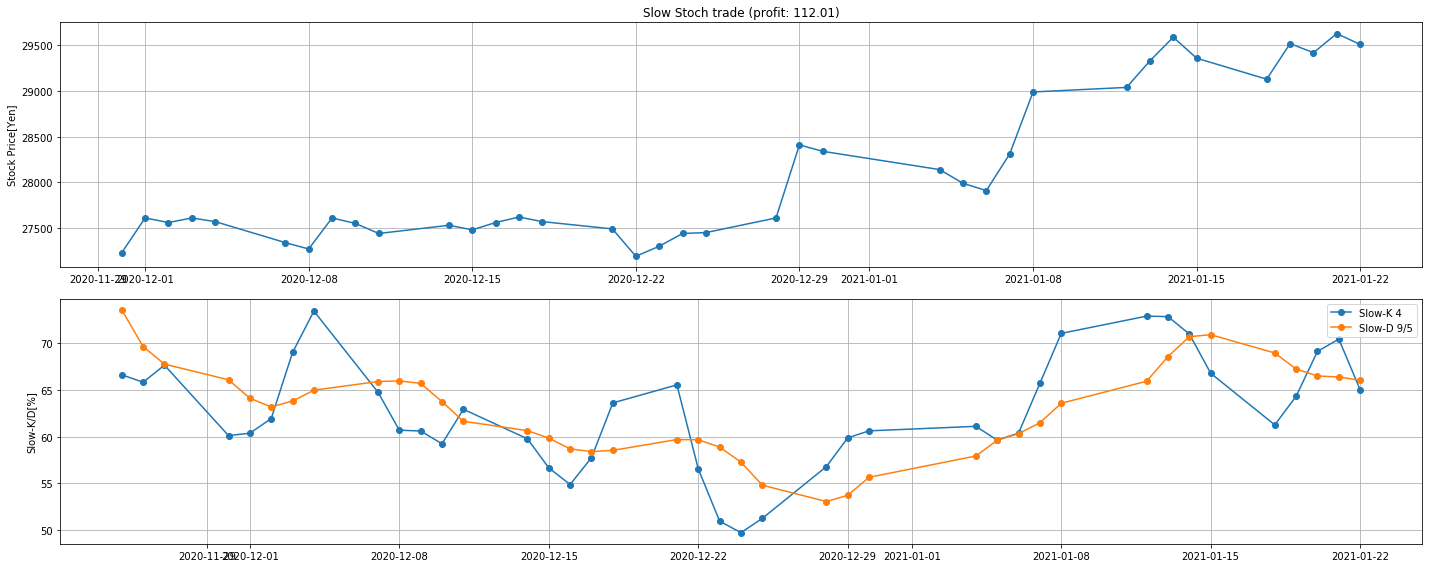

In [12]:
optimizer_slow_stoch.result_graph()

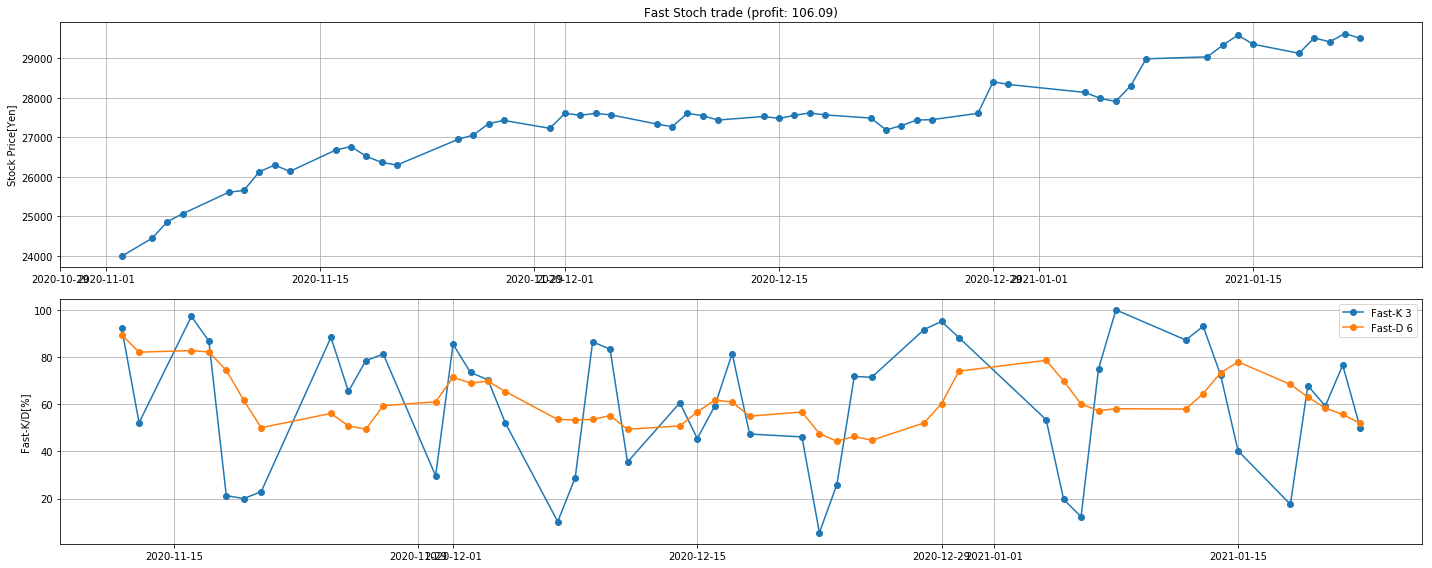

In [13]:
optimizer_fast_stoch.result_graph()

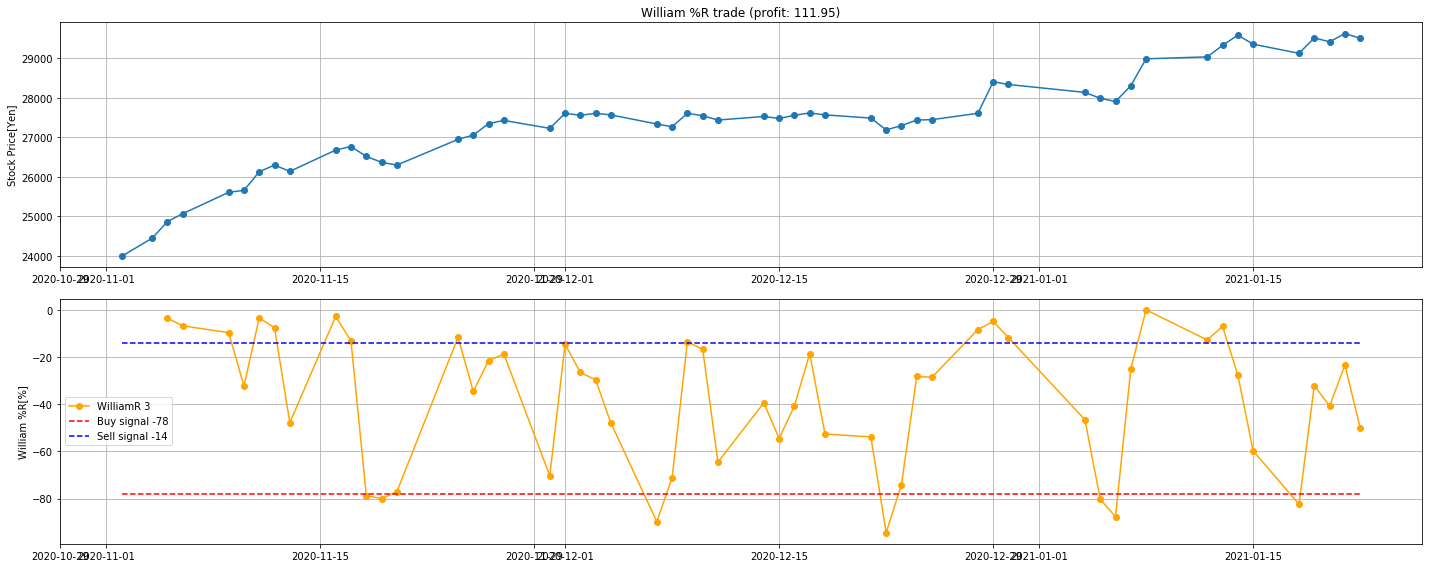

In [14]:
optimizer_william.result_graph()